<a href="https://colab.research.google.com/github/mardzyuba/Faker/blob/master/lesson_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

1. Взять датасет из домашнего задания №2. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.*

In [2]:
df_market = pd.read_csv('/content/marketing_campaign.csv')

print('Размер датасета df_market:', df_market.shape)
df_market.head(100)

Размер датасета df_market: (10037, 6)


,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True
...,...,...,...,...,...,...
95,a1095,1/5/18,House Ads,control,English,True
96,a1096,1/4/18,House Ads,control,English,False
97,a1097,1/5/18,House Ads,control,English,True
98,a1098,1/4/18,House Ads,control,English,False


In [3]:
df_market.nunique()

user_id               10037
date_served              31
marketing_channel         5
variant                   2
language_displayed        4
converted                 2
dtype: int64

In [5]:
df_1 = df_market.groupby(['variant', 'converted'])['converted'].count().unstack('converted')
df_1.columns.name = None

df_1.head()


,False,True
variant,,
control,4705,371
personalization,4241,705


In [6]:
import scipy.stats as stats
result = stats.chi2_contingency(df_1, correction = False)
chisq, pvalue = result[:2]
print('chisq = {}, pvalue = {}'.format(chisq, pvalue))

chisq = 126.07767827548582, pvalue = 2.9568009705199523e-29


Если Н0 - равентсво между control и personalization, то pvalue = 2.9568 > 0.05, что подтверждает, что отличия нет

---



2. Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола - 20 единиц (футов красного дерева). Стул требует 10 человеко-часов, стол - 15. Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

*Задаем целевую функцию: *Компанией производится 2 вида продукции: 
 
x - стулья y - столы 

45x+80y=z max прибыль 

Но есть ограничения: материалу 5x+20y <= 400 ед. 
по человеко-часам 10x+15y <= 450 ч. 
x => 0, y =>0 

Нам нужно найти такие x и y, чтобы выполнялись неравенства, а также ограничения x ≥ 0 и y ≥ 0. При этом решение должно соответствовать максимально возможному значению z

Независимые переменные, которые нужно найти (x и y) называют переменными решения (decision variables). Функция, которую необходимо максимизировать или минимизировать (z), – это целевая функция.

Заменим наши переменные на x0 и x1

---



In [7]:
from scipy.optimize import linprog

In [8]:
def value(x):
    return - 45*x[0] - 80*x[1]

In [9]:
non_xy = {'type': 'ineq',
             'fun': lambda x: np.array ([450 - 10 * x[0] - 15 * x[1],
                                         400 - 5  * x[0] - 20 * x[1]])}

In [10]:
from scipy.optimize import Bounds
bnds = Bounds([0, 0], [np.inf, np.inf])

In [12]:
from scipy.optimize import minimize
x0 = np.array([1, 1])
res = minimize(value, x0, method='SLSQP', constraints= non_xy, bounds=bnds)
print(res.x)

[24. 14.]


In [13]:
print('максимизированная прибыль составит:', -1*value([24, 14]),'$/месяц')

максимизированная прибыль составит: 2200 $/месяц


3.Средний накопленный доход на пользователя с сайта (cumulative ARPU) составил: day1 0.4 ,𝑑𝑎𝑦30.6 , day7 0.8 ,𝑑𝑎𝑦14 1.10  , day21 1.30 ,𝑑𝑎𝑦30 1.40 . Подберите аппроксимирующую кривую и сделайте прогноз, сколько в среднем принесет денег пользователь на 90й день. Обоснуйте выбор одной из аппроксимирующей кривой вида: y = ab^x или y = a*ln(x) + b.

---



In [14]:
df_3 = pd.DataFrame({'day': [1,3,7,14,21,30],
                   'acc_income $': [0.4,0.6,0.8,1.10,1.30,1.40]})
df_3.head(6)

,day,acc_income $
0,1,0.4
1,3,0.6
2,7,0.8
3,14,1.1
4,21,1.3
5,30,1.4


In [15]:
def log_func( x, a, b, c ):
    return -a * np.log2( b + x ) + c

In [16]:
def exp_func( x, a, b, c ):
    return a * np.exp( -b * x ) + c

In [17]:
from scipy.optimize import curve_fit
log_popt, log_pcov = curve_fit(log_func, df_3['day'], df_3['acc_income $'])

In [18]:
exp_popt, exp_pcov = curve_fit(exp_func, df_3['day'], df_3['acc_income $'])

In [19]:
projection_endpoint = 90

In [20]:
log_y_projected = log_func( np.arange( projection_endpoint ), *log_popt )
exp_y_projected = exp_func( np.arange( projection_endpoint ), *exp_popt )

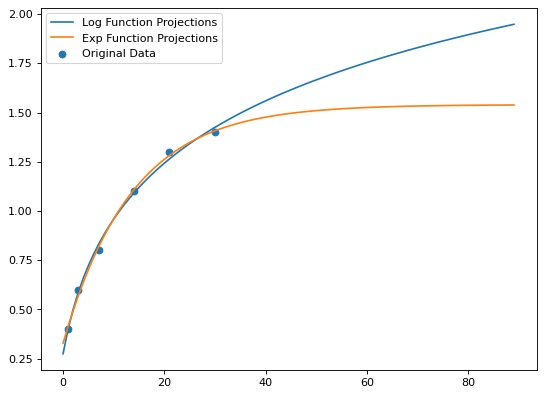

In [23]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_3['day'], df_3['acc_income $'], label="Original Data" )
plt.plot( log_y_projected, label="Log Function Projections" )
plt.plot( exp_y_projected, label="Exp Function Projections" )
plt.legend()
plt.show()

Более четкое движение по точкам - график по экспоненциальной функции!

In [24]:
print('Прогноз кол-ва пользователей через 90 дней по log модели', round(log_y_projected[89],0))
print('Прогноз кол-ва пользователей через 90 дней по exp модели', round(exp_y_projected[89],0))

Прогноз кол-ва пользователей через 90 дней по log модели 2.0
Прогноз кол-ва пользователей через 90 дней по exp модели 2.0


По прогнозу, обе функции совпадают!

In [26]:
y_log_pred = [log_y_projected[ i ] for i in list(df_3['day'])]
y_log_pred

[0.4012403005730712,
 0.5868265940243451,
 0.8306563510477587,
 1.0918230822447537,
 1.2643750867666117,
 1.425078584992837]

In [27]:
y_exp_pred = [exp_y_projected[ i ] for i in list(df_3['day'])]
y_exp_pred

[0.4152644555519349,
 0.5694065241828665,
 0.81720684756981,
 1.108495305483976,
 1.2823787722727733,
 1.4072480949334225]

In [28]:
df_3.head(6)

,day,acc_income $
0,1,0.4
1,3,0.6
2,7,0.8
3,14,1.1
4,21,1.3
5,30,1.4


Вывод: обе функция аппроксимирует исследуемую зависимость с маленькой среднеквадратической ошибкой, но ближе по значениям все-таки  экспоненциальная функция.

---



